In [1]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
#proportion initial
Z = {"Garçons 0-17":7089743,"Filles 0-17":6772962,"Hommes 18-25":2992571,"Femmes 18-25":2909618,"Hommes 26-50":9974755,"Femmes 26-50":10290162,"Hommes +50":11304370,"Femmes +50":13477871}
Homme_18_25 = {"taille" :{"gde 5 portes,7 places":0.167,"gde 5 portes, 5 places":0.389,"gde 5 portes, 4 places":0.194,"petite 3 portes, 4 places":0.167,"petite 3 portes, 2 places":0.028,"petite 2 portes, 2 places":0.056}, "moteur" :{"citadine":0.25 ,"berline":0.25 ,"sport":0.5 }, "consommation":{"electrique":0.389 ,"E ou D":0.611 },"kTaille":1/3,"kMoteur":1/6,"kConso":1/2}
Homme_26_50 = {"taille" :{"gde 5 portes,7 places":0,"gde 5 portes, 5 places":0.667,"gde 5 portes, 4 places":0.222,"petite 3 portes, 4 places":0,"petite 3 portes, 2 places":0.111,"petite 2 portes, 2 places":0}, "moteur" :{"citadine":0.222 ,"berline":0.444 ,"sport":0.333 }, "consommation":{"electrique":0.222 ,"E ou D": 0.778},"kTaille":1/4,"kMoteur":1/2,"kConso":1/4}
Homme_50_ou_plus = {"taille" :{"gde 5 portes,7 places":0,"gde 5 portes, 5 places":0.5,"gde 5 portes, 4 places":0,"petite 3 portes, 4 places":0.5,"petite 3 portes, 2 places":0,"petite 2 portes, 2 places":0}, "moteur" :{"citadine":0 ,"berline":0.5 ,"sport":0.5 }, "consommation":{"electrique":0.5 ,"E ou D":0.5 },"kTaille":1/2,"kMoteur":1/6,"kConso":1/3} 
Femme_18_25 = {"taille" :{"gde 5 portes,7 places":0,"gde 5 portes, 5 places":0.477,"gde 5 portes, 4 places":0.250,"petite 3 portes, 4 places":0.227,"petite 3 portes, 2 places":0,"petite 2 portes, 2 places":0.045}, "moteur" :{"citadine":0.386 ,"berline":0.409 ,"sport": 0.205}, "consommation":{"electrique":0.25 ,"E ou D":0.75 },"kTaille":1/3,"kMoteur":1/6,"kConso":1/2}
Femme_26_50 = {"taille" :{"gde 5 portes,7 places":0,"gde 5 portes, 5 places":0.333,"gde 5 portes, 4 places":0,"petite 3 portes, 4 places":0.333,"petite 3 portes, 2 places":0.333,"petite 2 portes, 2 places":0}, "moteur" :{"citadine":0.5 ,"berline":0.5 ,"sport":0 }, "consommation":{"electrique":0.167 ,"E ou D":0.833 },"kTaille":1/3,"kMoteur":1/6,"kConso":1/2}
Femme_50_ou_plus = {"taille" :{"gde 5 portes,7 places":0.333,"gde 5 portes, 5 places":0,"gde 5 portes, 4 places":0.667,"petite 3 portes, 4 places":0,"petite 3 portes, 2 places":0,"petite 2 portes, 2 places":0}, "moteur" :{"citadine":0.333 ,"berline":0.667 ,"sport":0 }, "consommation":{"electrique":0.333 ,"E ou D":0.667 },"kTaille":1/2,"kMoteur":1/3,"kConso":1/6}
#Dictionnaire des préférence des cliens déterminée de notre sondage
#"kTaille","kMoteur" et "kConso" sont des coefficients permettant de quantitifer le degré de préférence de chaque groupe de client par raaport à ces trois critères, plus ce coefficient est grand, plus le client accorde de l'importance à ce critère

Voiture = {"entreprise_1" : ["gde 5 portes, 5 places","citadine","electrique"], "entreprise_2":["petite 3 portes, 4 places","berline","E ou D"]} #Exemple de voiture pour chaque entreprise
catégorie = {"Hommes 18-25": Homme_18_25,"Hommes 26-50":Homme_26_50,"Hommes +50":Homme_50_ou_plus,"Femmes 18-25":Femme_18_25,"Femmes 26-50":Femme_26_50,"Femmes +50":Femme_50_ou_plus}



In [3]:
def score_première_periode(client,groupe,Z,Voiture):
    """dict[str:dict[str:float]]*str*int*dict[str:list[str]]
    La fonction compare les voitures des deux entreprises à partir d'un score qui dépendera des préférences des clients"""
    C1 = (round(Z[groupe]*(client["taille"][Voiture["entreprise_1"][0]]*client["kTaille"]+client["moteur"][Voiture["entreprise_1"][1]]*client["kMoteur"]+client["consommation"][Voiture["entreprise_1"][2]]*client["kConso"])))
    C2 = (round(Z[groupe]*(client["taille"][Voiture["entreprise_2"][0]]*client["kTaille"]+client["moteur"][Voiture["entreprise_2"][1]]*client["kMoteur"]+client["consommation"][Voiture["entreprise_2"][2]]*client["kConso"])))  
    return (C1,C2)

In [4]:
p1 = {0 : 0.4,
     1 : 0.4,
     2 : 0.15,
     3 : 0.05}  #nombre de descendants pour 18-25

p2 = {0 : 0.5,
     1 : 0.2,
     2 : 0.2,
     3 : 0.1}  #nombre de descendants pour 26-50

#On suppose que la population de +50 ans n'a pas de descendance
import random
def number_of_descendants(p):
    '''
    dict[int:float]->int
    Étant donnée une distibution de probabilité 'p', la fonction retourne le nombre de descendants d'un individu.
    '''
    u = np.random.random()
    s = 0
    for k in p.keys():
        s += p[k]
        if u < s:
            return k

def update_descendance(Z1,p):
    '''
    int*dict[int:float]->int
    Étant donnés un nombre d'individus 'C' et une distibution de probabilité de descendants 'p',
    la fonction retourne le nombre d'individus à la prochaine génération.
    '''
    Z_new1 = 0
    for k in range(Z1):
        #sum up all the descendants over all the population Z
        Z_new1 += number_of_descendants(p)
        
    return Z_new1



In [5]:
def update_age(Z):
    """dict[str:int] -> dict[str:int] 
    Rend la population en l'ayant fait vieillir"""
    
    Z_suivant = dict()
    Z_suivant["Garçons 0-17"] = round(update_descendance(Z["Femmes 18-25"],p1)/2) + round(update_descendance(Z["Femmes 26-50"],p2)/2)
    Z_suivant["Filles 0-17"] = round(update_descendance(Z["Femmes 18-25"],p1)/2) + round(update_descendance(Z["Femmes 26-50"],p2)/2)              
    Z_suivant["Hommes 18-25"] = Z["Garçons 0-17"]
    Z_suivant["Femmes 18-25"] = Z["Filles 0-17"]
    Z_suivant["Hommes 26-50"] = Z["Hommes 18-25"]
    Z_suivant["Femmes 26-50"] = Z["Femmes 18-25"]
    Z_suivant["Femmes +50"] = Z["Femmes 26-50"]
    Z_suivant["Hommes +50"] = Z["Hommes 26-50"]
    return Z_suivant

In [6]:
def update_age_generation(Z,n):
    """dict[str:int]*int -> dict[str:int]
    Met à jour l'age de la population n fois"""
    Z_new = Z
    for k in range(0,n):
        Z_new = update_age(Z_new)
        
    return Z_new   

In [7]:
#Dictionnaire des composantes non-variables avec leur prix
Composantes= {"disque de frein":227.07,"arbre de transmission":94.25,"pare-brise":70.52,"pare-choc":400,"capot":239.10,"5 roues":950,"jantes":1500,"essuie-glace":38.30,"rétro intérieur":12.5,"rétro exterieur":120,"volant":166.70,"batterie":74.94,"lave-glace":50,"radiateur":193.94,"allumeur":51,"alternateur":361.44,"feu rouge avant et arriere":96.6} 

#Dictionnaire des composantes variables avec leur prix
Criteres = {"gde 5 portes, 5 places":1946,"gde 5 portes,7 places":2246,"gde 5 portes, 4 places":1796, "petite 3 portes, 4 places":1317.6,"petite 3 portes, 2 places":1017.6,"petite 2 portes, 2 places":778.4,"sport":3085.44,"citadine": 1234.18,"berline":1542.72,"E ou D":105,"electrique":17.5}

def prix_première_période(entreprise_1,entreprise_2,marge):
    """list[str]*list[str]*float -> tuple[int,int]
    Hypothèse: marge doit être un pourcentage
    Calcule le prix de vente de chaque voiture pour 2 entreprises"""
    S1=0
    S2=0
    for c,u in Composantes.items():
        S1=S1+u
    S2 = S1
    for l in entreprise_1:
        S1 += Criteres[l]
    for e in entreprise_2:
        S2 += Criteres[e]
    return (round(S1*(1+marge)),round(S2*(1+marge)))


In [8]:
import random
def score_et_prix_n_periode(Voiture,Z,n,marge):
    """dict[str:list[str]]*int*int*float -> tuple[list[int],list[int],list[int],list[int],list[str],list[str]]
    Rend le score et le prix de n voitures choisies aléatoirement pour chaque entreprise et le dicitonnaire correspondant à chaque voiture"""
    L1= []
    L2 = []
    Z_new = Z
    V1= [Voiture["entreprise_1"]]
    V2 =[Voiture["entreprise_2"]]
    Voiture_new = Voiture
    P1 = []
    P2 = []
    score1 = 0
    score2 = 0
    for i in range(0,n):
        for c,d in catégorie.items():
            k, l = score_première_periode(d,c,Z_new,Voiture_new)
            score1 += k
            score2 += l
        L1.append(score1)
        L2.append(score2)
        score1 = 0
        score2 = 0
        o,p = prix_première_période(Voiture_new["entreprise_1"],Voiture_new["entreprise_2"],marge)
        P1.append(o)
        P2.append(p)
        Voiture_new["entreprise_1"]=[]
        Voiture_new["entreprise_2"]=[]
        Voiture_new["entreprise_1"].append(random.choice(list(Homme_18_25["taille"].keys())))
        Voiture_new["entreprise_1"].append(random.choice(list(Homme_18_25["moteur"].keys())))
        Voiture_new["entreprise_1"].append(random.choice(list(Homme_18_25["consommation"].keys())))
        Voiture_new["entreprise_2"].append(random.choice(list(Homme_18_25["taille"].keys())))
        Voiture_new["entreprise_2"].append(random.choice(list(Homme_18_25["moteur"].keys())))
        Voiture_new["entreprise_2"].append(random.choice(list(Homme_18_25["consommation"].keys())))
        V1.append(Voiture_new["entreprise_1"])
        V2.append(Voiture_new["entreprise_2"])
        Z_new = update_age(Z_new)
    return (L1,L2,P1,P2,V1,V2)

In [9]:
def chiffre_affaire(Voiture,Z,n,marge):
    """dict[str:list[str]]*int*int*float -> tuple[list[int],list[int],list[int],list[int],list[int],list[int],list[str],list[str]]
    Renvoie le chiffre d'affaire, le score, le prix de la voiture de chaque entreprise et le dictionnaire correspondant à chaque voiture à chaque génération"""
    u,v,w,x,y,z = score_et_prix_n_periode(Voiture,Z,n,marge)
    CA1 = 0
    CA2 = 0
    L1=[]
    L2=[]
    for i in range(0,n):
        a,b = prix_première_période(y[i],z[i],0)
        CA1 += u[i]*w[i]-a
        CA2 += v[i]*x[i]-b
        L1.append(CA1)
        L2.append(CA2)
        CA1 = 0
        CA2 = 0
    return (L1,L2,u,v,w,x,y,z)

In [10]:
def bar_score(L1,L2,n):
    """list[int]**2 * int -> None """
    score1 = L1
    score2 = L2
 
    fig, ax = plt.subplots()
    index = np.arange(n)
    bar_width = 0.35
    opacity = 0.8
 
    rects1 = plt.bar(index, score1, bar_width, alpha=opacity, color='purple', label="Entreprise 1")

    rects2 = plt.bar(index + bar_width, score2, bar_width,
    alpha=opacity,
    color='pink',
    label='Entreprise 2')
 
    plt.xlabel('Génération')
    plt.ylabel('Scores')
    plt.title('Scores par génération')
    plt.xticks(index + bar_width, [i for i in range(1,n+1)])
    plt.legend()
 
    plt.tight_layout()
    plt.show()
    return 

t,u,v,w,x,y,z,z2 = chiffre_affaire(Voiture,Z,10,0.3)


In [11]:
def bar_prix(L1,L2,n):
    """list[int]**2 * int -> None """
    score1 = L1
    score2 = L2
 
    fig, ax = plt.subplots()
    index = np.arange(n)
    bar_width = 0.35
    opacity = 0.8
 
    rects1 = plt.bar(index, score1, bar_width, alpha=opacity, color='yellow', label="Entreprise 1")

    rects2 = plt.bar(index + bar_width, score2, bar_width,
    alpha=opacity,
    color='pink',
    label='Entreprise 2')
 
    plt.xlabel('Génération')
    plt.ylabel('Prix')
    plt.title('Prix par génération')
    plt.xticks(index + bar_width, [i for i in range(1,n+1)])
    plt.legend()
 
    plt.tight_layout()
    plt.show()
    return 


[['gde 5 portes, 5 places' 'citadine' 'electrique']
 ['petite 3 portes, 4 places' 'citadine' 'electrique']
 ['petite 3 portes, 2 places' 'berline' 'electrique']
 ['gde 5 portes, 5 places' 'berline' 'E ou D']
 ['petite 3 portes, 4 places' 'berline' 'electrique']
 ['petite 2 portes, 2 places' 'berline' 'electrique']
 ['gde 5 portes, 4 places' 'berline' 'electrique']
 ['petite 2 portes, 2 places' 'berline' 'electrique']
 ['gde 5 portes, 4 places' 'berline' 'E ou D']
 ['gde 5 portes, 5 places' 'citadine' 'E ou D']
 ['gde 5 portes, 4 places' 'citadine' 'electrique']] [['petite 3 portes, 4 places' 'berline' 'E ou D']
 ['gde 5 portes,7 places' 'berline' 'E ou D']
 ['gde 5 portes, 4 places' 'sport' 'electrique']
 ['gde 5 portes, 4 places' 'sport' 'electrique']
 ['gde 5 portes, 5 places' 'citadine' 'electrique']
 ['petite 3 portes, 2 places' 'sport' 'electrique']
 ['gde 5 portes, 5 places' 'sport' 'E ou D']
 ['gde 5 portes, 4 places' 'citadine' 'electrique']
 ['gde 5 portes,7 places' 'berline' 

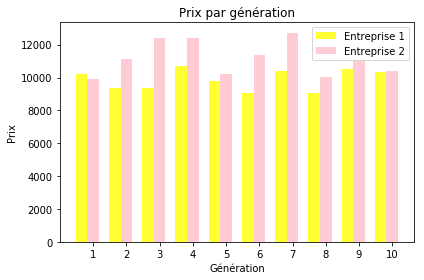

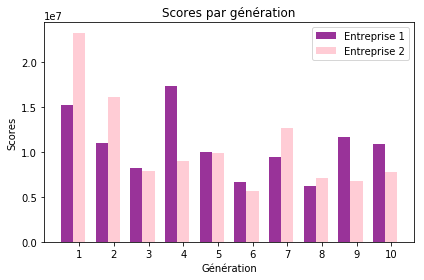

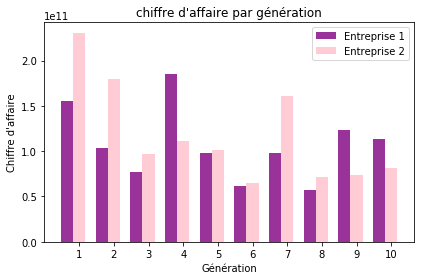

In [12]:
def bar_chiffre_affaire(L1,L2,n):
    """list[int]**2 * int -> None """
    CA1 = L1
    CA2 = L2
 
    fig, ax = plt.subplots()
    index = np.arange(n)
    bar_width = 0.35
    opacity = 0.8
 
    rects1 = plt.bar(index, CA1, bar_width, alpha=opacity, color='purple', label="Entreprise 1")

    rects2 = plt.bar(index + bar_width, CA2, bar_width,
    alpha=opacity,
    color='pink',
    label='Entreprise 2')
 
    plt.xlabel('Génération')
    plt.ylabel("Chiffre d'affaire")
    plt.title("chiffre d'affaire par génération")
    plt.xticks(index + bar_width, [i for i in range(1,n+1)])
    plt.legend()
 
    plt.tight_layout()
    plt.show()
    return 

print(np.array(z),np.array(z2))
bar_prix(x,y,10)
bar_score(v,w,10)
bar_chiffre_affaire(t,u,10)

les budgets :
- Hommes 18-25 : [0,7000],[7000,9000],[9000,11000]
- Femmes 18-25 : [0,7000],[7000,9000],[9000,11000]
- Hommes 26-50 : [0,12000],[12000,15000],[15000,20000]
- Femmes 26-50 : [0,10000],[10000,13000],[13000,16000]
- Hommes +50 : [0,9000],[9000,11000],[11000,13000]
- Femmes +50 : [0,7000],[7000,9000],[9000,12000]

In [ ]:
budget = {"Hommes 18-25" : {1 : [0,7000], 2/3 :[7000,9000], 1/3 : [9000,11000]},"Femmes 18-25" : {1 : [0,7000], 2/3 :[7000,9000], 1/3 : [9000,11000]},"Hommes 26-50" : {1 : [0,12000], 2/3 :[12000,15000], 1/3 : [15000,20000]},"Femmes 26-50" : {1 : [0,10000], 2/3 :[10000,13000], 1/3 : [13000,16000]},"Hommes +50" : {1 : [0,9000], 2/3 :[9000,11000], 1/3 : [11000,13000]},"Femmes +50" :{1 : [0,7000], 2/3 :[7000,9000], 1/3 : [9000,12000]}}

In [ ]:
def score_dependance_prix(marge):
    """float -> tuple[int,int]
    La fonction donne le score, qui est le nombre de clients, en prenant en compte le budget de chaque catégorie de clients et le prix de la voiture"""
    score1 = 0
    score2 = 0
    S1 = 0
    S2 = 0
    r,s = prix_première_période(Voiture["entreprise_1"],Voiture["entreprise_2"],marge)
    for m,l in catégorie.items():
        u,v = score_première_periode(l,m,Z,Voiture)
        for i in budget[m]:
            if r > budget[m][i][0] and r < budget[m][i][1]:
                score1 = u*i
                S1 += score1
                score1 = 0
            if s > budget[m][i][0] and s < budget[m][i][1]:
                score2 = v*i
                S2 += score2
                score2 = 0    
    return (round(S1),round(S2))                

In [ ]:
def score_dependance_et_prix_n_période(Voiture,Z,marge,n):
    """float*int -> tuple[list[int],list[int],list[int],list[int],list[str]],list[str]]
    Rend le score et le prix de n voitures choisies aléatoirement pour chaque entreprise et le dicitonnaire correspondant à chaque voiture en tenant compte du budget de chaque categorie de client """
    Voiture_new = Voiture
    V1 = [Voiture["entreprise_1"]]
    V2 = [Voiture["entreprise_2"]]
    Z_new = Z
    u,v = score_dependance_prix(marge)
    L1 = [u]
    L2 = [v]
    score1 = 0
    score2 = 0
    r,s = prix_première_période(Voiture["entreprise_1"],Voiture["entreprise_2"],marge)
    P1 = [r]
    P2 = [s]
    S1 = 0
    S2 = 0
    for _ in range(1,n):
        Voiture_new["entreprise_1"]=[]
        Voiture_new["entreprise_2"]=[]
        Voiture_new["entreprise_1"].append(random.choice(list(Homme_18_25["taille"].keys())))
        Voiture_new["entreprise_1"].append(random.choice(list(Homme_18_25["moteur"].keys())))
        Voiture_new["entreprise_1"].append(random.choice(list(Homme_18_25["consommation"].keys())))
        Voiture_new["entreprise_2"].append(random.choice(list(Homme_18_25["taille"].keys())))
        Voiture_new["entreprise_2"].append(random.choice(list(Homme_18_25["moteur"].keys())))
        Voiture_new["entreprise_2"].append(random.choice(list(Homme_18_25["consommation"].keys())))
        V1.append(Voiture_new["entreprise_1"])
        V2.append(Voiture_new["entreprise_2"])
        x,y = prix_première_période(Voiture_new["entreprise_1"],Voiture_new["entreprise_2"],marge)
        P1.append(x)
        P2.append(y)
        Z_new = update_age(Z_new)
        for m,l in catégorie.items():
            h,psi = score_première_periode(l,m,Z_new,Voiture_new)
            for i in budget[m]:
                if x > budget[m][i][0] and x < budget[m][i][1]:
                    score1 = h*i
                    S1 += score1
                    score1 = 0
                if y > budget[m][i][0] and y < budget[m][i][1]:
                    score2 = psi*i
                    S2 += score2
                    score2 = 0
        L1.append(round(S1))
        L2.append(round(S2))
        S1=0
        S2=0
    return (L1,L2,P1,P2,V1,V2)

In [ ]:
def chiffre_affaire_2(Voiture,Z,marge,n):
    """float*int -> tuple[list[int],list[int],list[int],list[int],list[int],list[int],list[str],list[str]]
    Renvoie le chiffre d'affaire, le score, le prix de la voiture de chaque entreprise et le dictionnaire de chaque voiture à chaque génération"""
    u,v,w,x,y,z = score_dependance_et_prix_n_période(Voiture,Z,marge,n)
    L1 = []
    L2 = []
    CA1 = 0 
    CA2 = 0
    for i in range(0,n):
        a,b = prix_première_période(y[i],z[i],0)
        CA1 = u[i]*w[i]-a
        CA2 = v[i]*x[i]-b
        L1.append(CA1)
        L2.append(CA2)
        CA1 = 0
        CA2 = 0
    return (L1,L2,u,v,w,x,y,z)
    

In [ ]:
a,b,c,d,e,f,g,h = chiffre_affaire_2(Voiture,Z,0.3,10)
print(np.array(g),np.array(h))

bar_prix(e,f,10)

bar_score(c,d,10)

bar_chiffre_affaire(a,b,10)
